This exercise introduces regression in Python
We'll be analysing data on diabetes.

In [3]:
import pandas as pd

diabetes_df = pd.read_csv("data/diabetes_clean.csv")

diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Create feature and target arrays

X = diabetes_df.drop("glucose", axis = 1).values
y = diabetes_df["glucose"].values

numpy.ndarray

### Making predictions from a single feature
If we want to make prediction using the bmi feature we first need to strip it out. 

In [9]:
X_bmi = X[:, 3]
# print(X_bmi)

# X_bmi is currently a one dimensional array, but scikit learn needs
# this to be a two dimensional array so we need to change it

X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

(768, 1)


Plot glucose against bmi

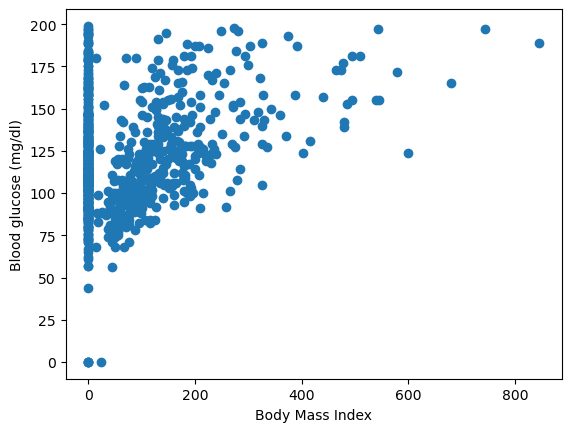

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Blood glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

### Now we'll introduce a LinearRegression model

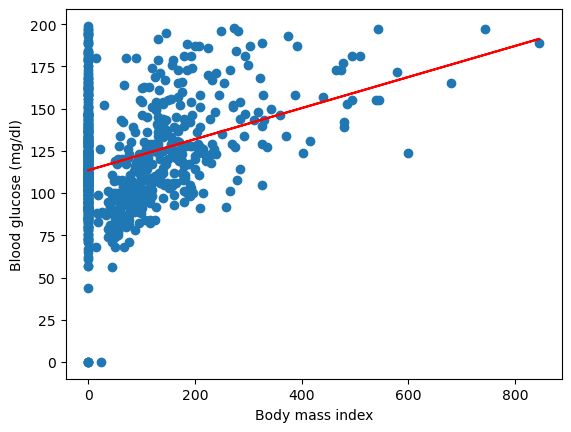

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color = 'red')
plt.ylabel("Blood glucose (mg/dl)")
plt.xlabel("Body mass index")
plt.show()

### Building and evaluating a multiple linear regression model

In [25]:
from sklearn.model_selection import train_test_split

# we'll use the radio sales data from the course example here
sales_df = pd.read_csv("data/advertising_and_sales_clean.csv")


# Create X and y arrays
X = sales_df.drop(["sales", "influencer"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# instantiate the model
reg = LinearRegression()

# fit the model
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))


Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


In [26]:
# calculate the metrics for the model
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.433199600101


### Cross validation

In [30]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

kf = KFold(n_splits=6, shuffle = True, random_state = 42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv = kf)
print(cv_results)

# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

[0.99900913 0.99898729 0.99897163 0.99898887 0.99893043 0.99905966]
0.9989911695584723
3.895599514495595e-05
[0.99893558 0.99905335]


Regularised regression - Lasso

[ 3.56256962 -0.00397035  0.00496385]


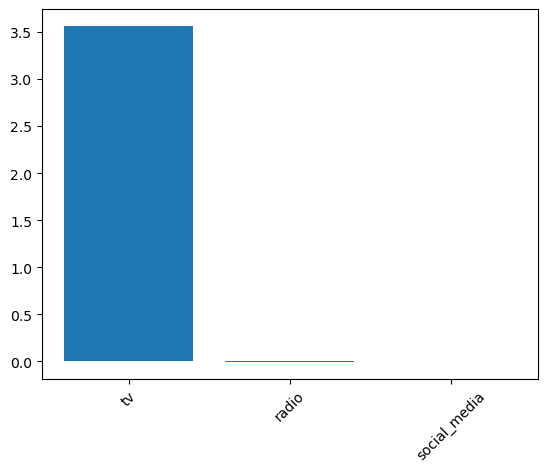

In [33]:
# Import Lasso
from sklearn.linear_model import Lasso

# we'll use the radio sales data from the course example here
sales_df = pd.read_csv("data/advertising_and_sales_clean.csv")


# Create X and y arrays
X = sales_df.drop(["sales", "influencer"], axis=1).values
y = sales_df["sales"].values
sales_columns = sales_df.drop(["sales", "influencer"], axis=1).columns
# Instantiate a lasso regression model
lasso = Lasso(alpha = 0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()